# Imports

In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)


c:\Users\PC\Data\ads_fraud_detection


In [2]:
from config.config import *
from libs.common import *
init_notebook_mode(connected=True)
print(tf.__version__) # requires version >= 1.9.0

c:/Users/PC/Data/ads_fraud_detection


2.13.0


In [3]:
# pd.options.mode.chained_assignment = None

In [4]:
save_dir=f"{exps_dir}/exp_prj_fake_jobs_postings"
if os.path.exists(save_dir) == False:
  os.makedirs(save_dir, exist_ok=True)



# Data Exploration

In [5]:
df = pd.read_csv(f'{data_dir}/fake_job_postings/fake_job_postings.csv')

In [6]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [7]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [9]:
df.shape

(17880, 18)

<Axes: >

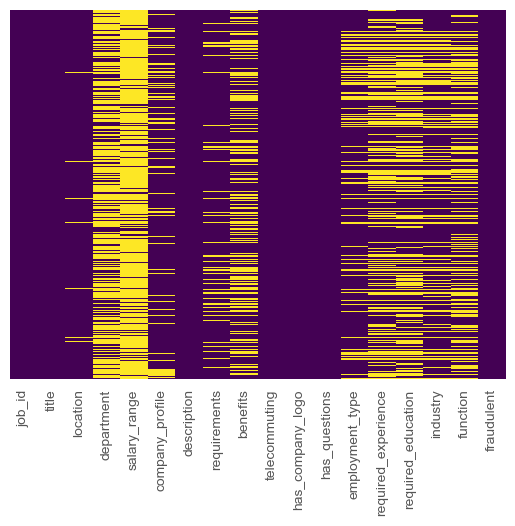

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [14]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [15]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [16]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [18]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

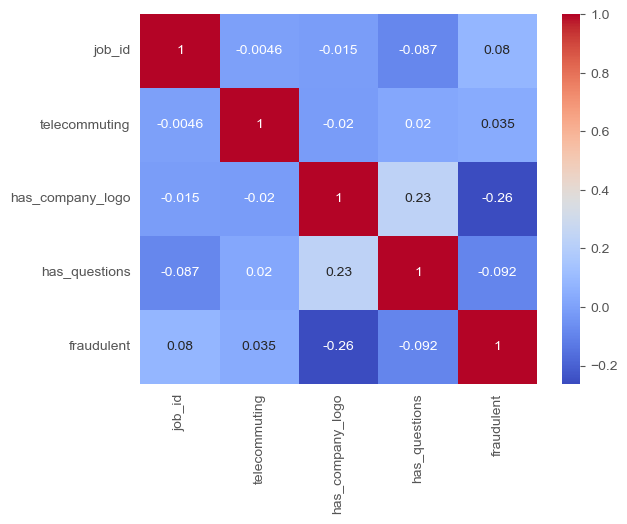

In [19]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [20]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

<Axes: xlabel='has_company_logo'>

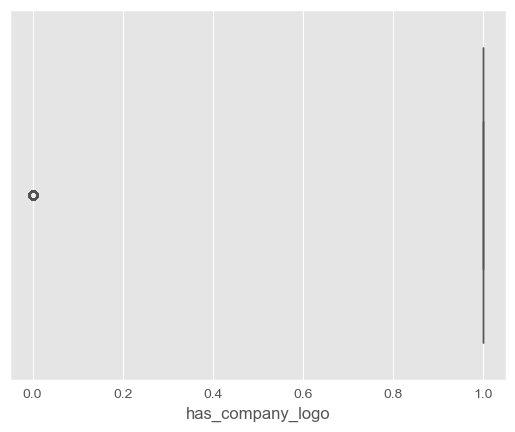

In [21]:
sns.boxplot(x='has_company_logo',data=df)

In [22]:
df=df[df['has_company_logo']>0.0]

<Axes: xlabel='has_company_logo'>

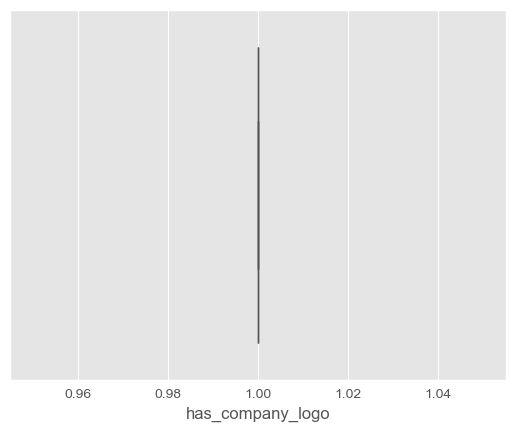

In [23]:
sns.boxplot(x='has_company_logo',data=df)

In [24]:
df['country'] = df['location'].str.split(',').str[0]

In [25]:
df.nunique()

job_id                 14220
title                   9091
location                2393
department              1078
salary_range             659
company_profile         1579
description            11723
requirements            9811
benefits                5094
has_company_logo           1
employment_type            5
required_experience        7
required_education        13
industry                 129
function                  37
fraudulent                 2
country                   86
dtype: int64

<Axes: xlabel='fraudulent', ylabel='count'>

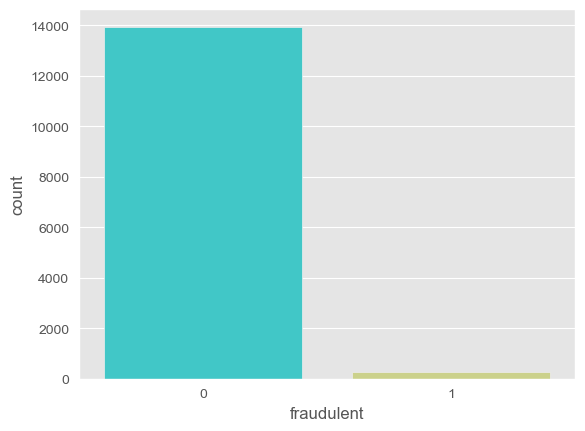

In [26]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

In [27]:
fake=df[df['fraudulent']==1]
fake.shape

(283, 17)

In [28]:
real=df[df['fraudulent']==0]
real.shape

(13937, 17)

In [29]:
df.shape

(14220, 17)

In [30]:
fake=fake.sample(13937,replace=True)

In [31]:
real.shape,fake.shape

((13937, 17), (13937, 17))

In [32]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,11566,Information Security Manager,"US, CA, San Mateo",Information Technology,NaN,Bright Edge and Aptitude Staffing Solutions ha...,This leading-edge company drives over $3 billi...,Required Skills and Experience: Bachelor’s deg...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,1,US
1,1,3619,"Agency Sales Managers $150-$175,000/yr","US, NY, Chautauqua",NaN,NaN,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,We Provide- Complete online training and offic...,1,Full-time,Associate,High School or equivalent,Financial Services,Sales,1,US
2,2,5839,UST Testing Technician III,"US, CA, Bakersfield, CA",Oil & Energy,70000-80000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Responsibilities &amp; Position Requirements:T...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,3,11551,SEO Analysis,"US, CA, San Mateo",Information Technology,NaN,Aptitude Staffing Solutions has redesigned the...,Seeking an SEO Analyst to drive traffic from o...,Qualifications: 2+ years of experience with pr...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Information Technology,1,US
4,4,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


<Axes: xlabel='fraudulent', ylabel='count'>

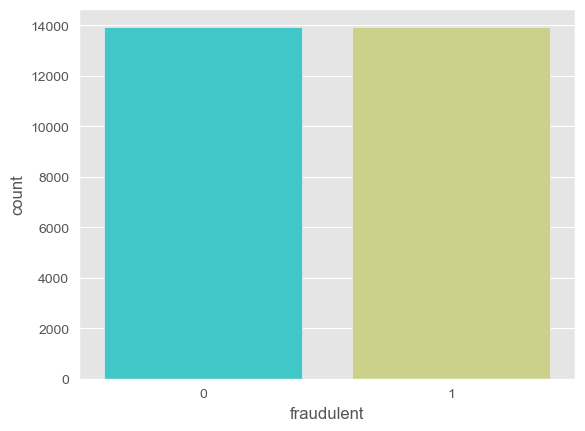

In [33]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

Text(0, 0.5, 'No. of Jobs')

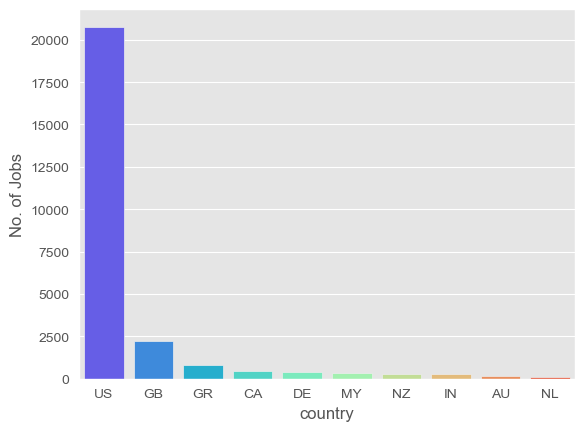

In [34]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

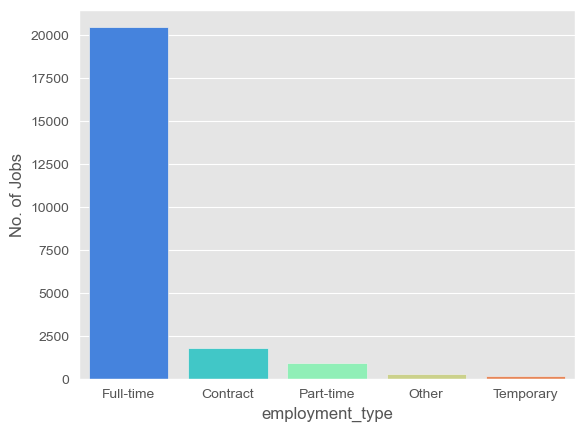

In [35]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [36]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,11566,Information Security Manager,"US, CA, San Mateo",Information Technology,NaN,Bright Edge and Aptitude Staffing Solutions ha...,This leading-edge company drives over $3 billi...,Required Skills and Experience: Bachelor’s deg...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,1,US
1,3619,"Agency Sales Managers $150-$175,000/yr","US, NY, Chautauqua",NaN,NaN,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,We Provide- Complete online training and offic...,1,Full-time,Associate,High School or equivalent,Financial Services,Sales,1,US
2,5839,UST Testing Technician III,"US, CA, Bakersfield, CA",Oil & Energy,70000-80000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Responsibilities &amp; Position Requirements:T...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,11551,SEO Analysis,"US, CA, San Mateo",Information Technology,NaN,Aptitude Staffing Solutions has redesigned the...,Seeking an SEO Analyst to drive traffic from o...,Qualifications: 2+ years of experience with pr...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Information Technology,1,US
4,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


Text(0, 0.5, 'No. of Jobs')

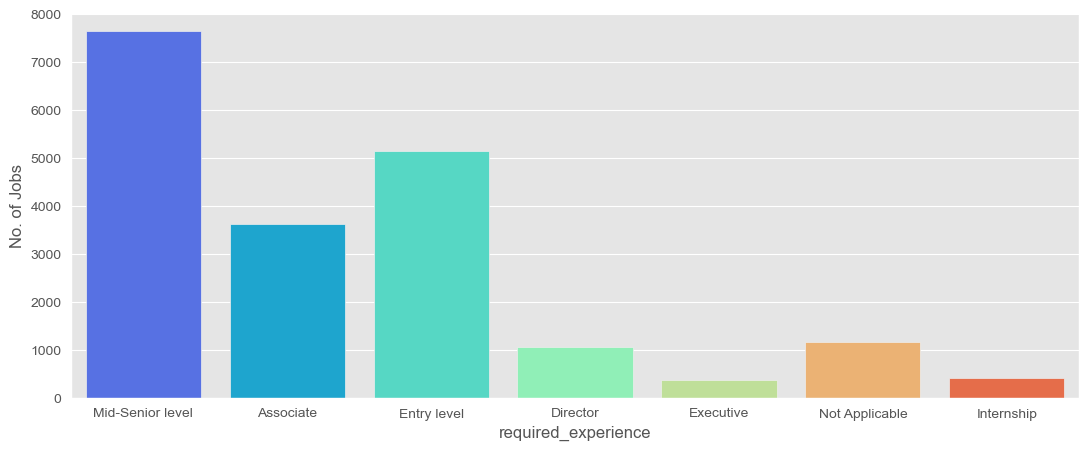

In [37]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

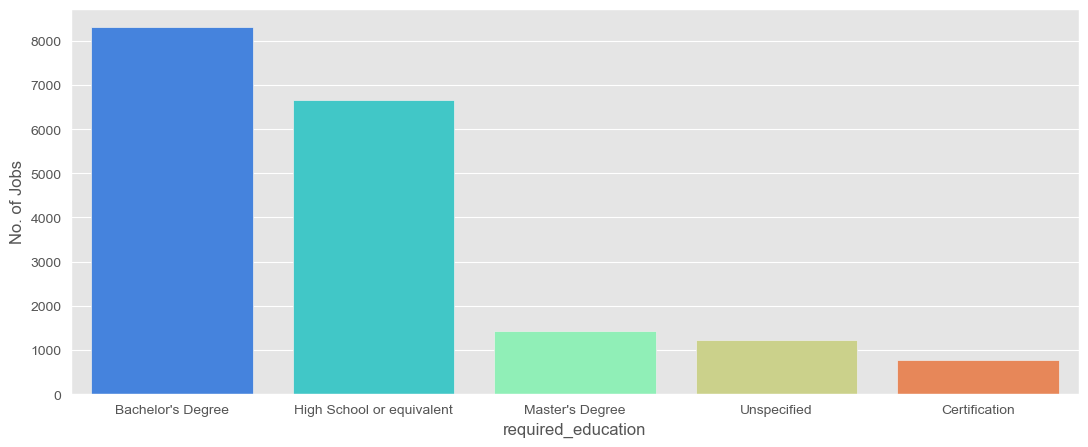

In [38]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [39]:
df.fillna(' ',inplace=True)

In [40]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [41]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,11566,Information Security Manager,"US, CA, San Mateo",Information Technology,,Bright Edge and Aptitude Staffing Solutions ha...,This leading-edge company drives over $3 billi...,Required Skills and Experience: Bachelor’s deg...,,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,1,US
1,3619,"Agency Sales Managers $150-$175,000/yr","US, NY, Chautauqua",,,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,We Provide- Complete online training and offic...,1,Full-time,Associate,High School or equivalent,Financial Services,Sales,1,US
2,5839,UST Testing Technician III,"US, CA, Bakersfield, CA",Oil & Energy,70000-80000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Responsibilities &amp; Position Requirements:T...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,11551,SEO Analysis,"US, CA, San Mateo",Information Technology,,Aptitude Staffing Solutions has redesigned the...,Seeking an SEO Analyst to drive traffic from o...,Qualifications: 2+ years of experience with pr...,,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Information Technology,1,US
4,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,,,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,1,Contract,,,Utilities,,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


In [42]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [43]:
df.drop('country',axis=1,inplace=True)

In [44]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,11566,1,1,"Information Security Manager US, CA, San Mateo..."
1,3619,1,1,"Agency Sales Managers $150-$175,000/yr US, NY,..."
2,5839,1,1,"UST Testing Technician III US, CA, Bakersfield..."
3,11551,1,1,"SEO Analysis US, CA, San Mateo Aptitude Staf..."
4,17735,1,1,"Customer Service Representative US, TX, Housto..."


In [45]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

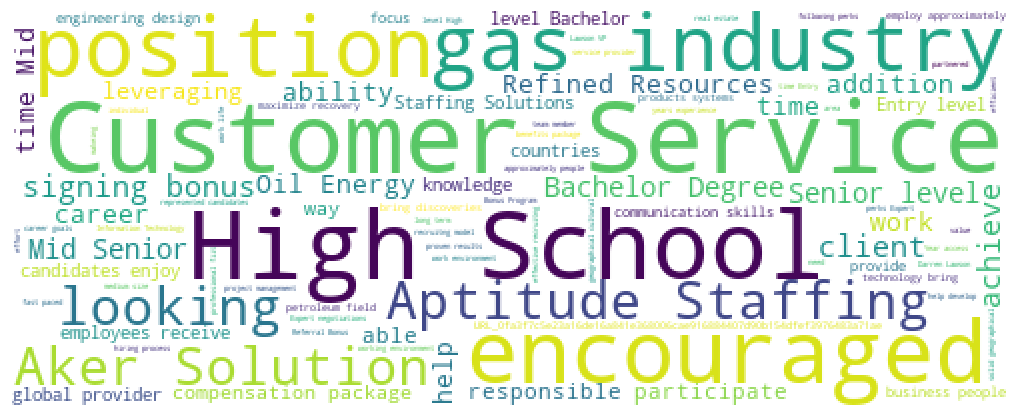

In [46]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

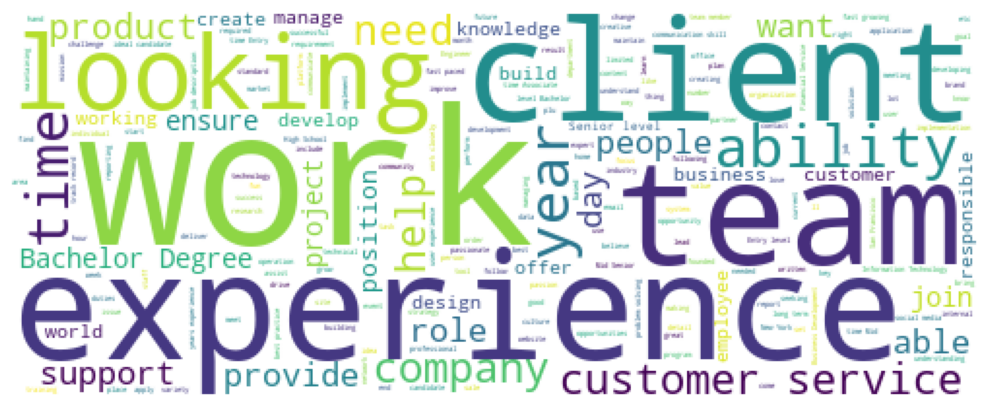

In [47]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [48]:
numeric_columns = list(df.select_dtypes(['number']).columns)
numeric_columns
change_tocategory=[i for i in numeric_columns if len(df[i].unique())<=46]
#change_tocategory.remove('umbrella_limit')
change_tocategory

['has_company_logo', 'fraudulent']

In [49]:
df[change_tocategory]=df[change_tocategory].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27874 entries, 0 to 27873
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job_id            27874 non-null  int64   
 1   has_company_logo  27874 non-null  category
 2   fraudulent        27874 non-null  category
 3   combined_text     27874 non-null  object  
dtypes: category(2), int64(1), object(1)
memory usage: 490.3+ KB


In [50]:
df.to_csv(f'{save_dir}/df_EDA.csv', index=None)
object_columns = list(df.select_dtypes(['object']).columns)
df[object_columns]=df[object_columns].astype('category')
category_columns = list(df.select_dtypes(['category']).columns)
numeric_columns = list(df.select_dtypes(['number']).columns)

np.savez(f'{save_dir}/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)
